## Used Cars | May Cooper

## Objective: Predicting Sale Price of Used Cars

To provide stastical information on average sale and used car market in India in order for people to make informed buyign choices and get a good deal on a used vehicle. 


### Questions we'll tackle

- What is the average price for a car 
- What is the average kms driven for a car 
- What are the top car features that influence price

### ML Objective

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance with the:

- Mean squared error (mse)
- Root squared of the mean squared error (rmse)
- R-squared (r2).

In [1]:
# Import required libraries for EDA and Data Preparation

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

#math libraries
import numpy as np
import pandas as pd
import numpy.random as nr
from scipy import stats
import time
import datetime
import tensorflow as tf
# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#seaborn
import seaborn as sns

#sklearn
from sklearn.preprocessing import MinMaxScaler

#ploty
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Kaggle
# Dataset owner - Nehal Birla
# Date created - 2018-06-24

# Read the dataset & check that all dtypes are correct 
df= pd.read_csv('car details.csv')
df.head()
df.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
df.shape

(8128, 13)

## Target Variable

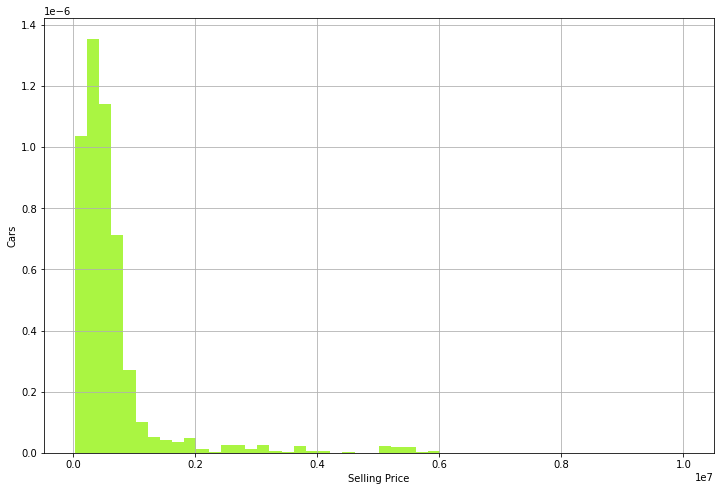

In [5]:
# histogran to evaluate target distribution

df['selling_price'].hist(bins=50, density=True,color='#aaf542')
plt.ylabel('Cars')
plt.xlabel('Selling Price')
plt.show();

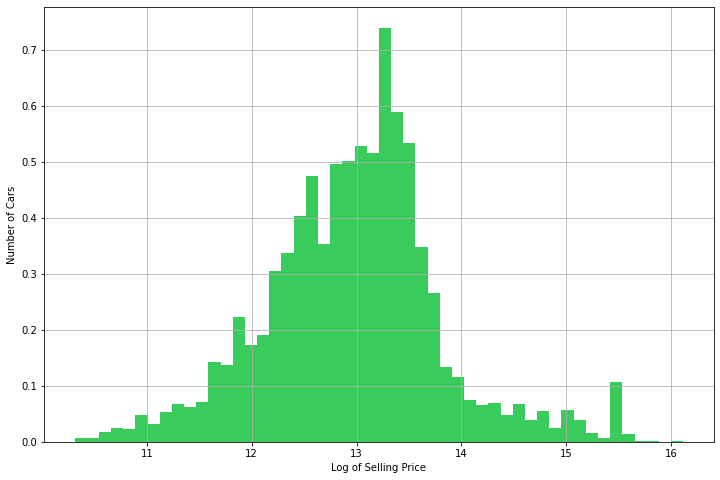

In [6]:
# Let's apply a logarithmic function to scale the target variable

np.log(df['selling_price']).hist(bins=50, density=True,color='#39cc5c')
plt.ylabel('Number of Cars')
plt.xlabel('Log of Selling Price')
plt.show();

## Variable Types

Next, let's identify the categorical and numerical variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Detecting Nulls

In [8]:
#How much of the nulls in percent? 
percentNull = df.isnull().sum()*100 /len(df)
percentNull.sort_values(ascending = False).head(10)

torque           2.731299
mileage          2.718996
engine           2.718996
seats            2.718996
max_power        2.645177
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
dtype: float64

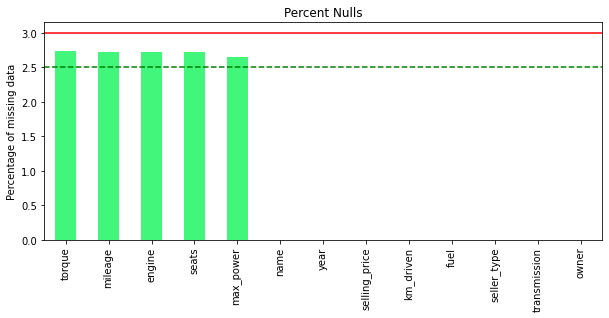

In [9]:
# plotting nulls
percentNull.sort_values(ascending = False).plot.bar(figsize=(10, 4), color='#42f57b')
plt.ylabel('Percentage of missing data')
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=2.5, color='g', linestyle='--')
plt.title('Percent Nulls')

plt.show();

## Feature Engineering & Outlier Removal

In [10]:
# Using domain knowledge, we see that the price is in Indian Rupee
# Therefore, we reengineer the price column and convert it to USD (exchange rate of Aug, 2021)
df.selling_price = df.selling_price*0.01345212

Number of rows before: (8128, 13)


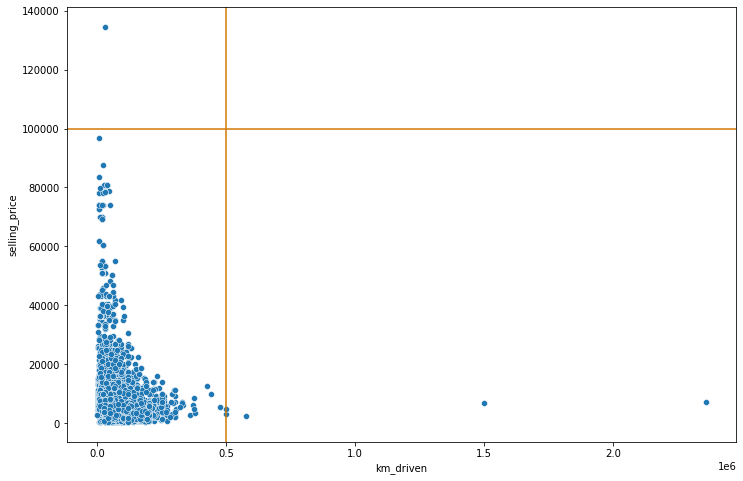

In [11]:
# Outlier removal of Kms driven and selling price
sns.scatterplot(df.km_driven, y=df.selling_price)
plt.axvline(x=500000,color='#d17804')
plt.axhline(y=100000,color='#d17804')
print(f"Number of rows before: {df.shape}")
df.drop(df.km_driven[df.km_driven > 500000].index, axis=0,inplace=True)
df.drop(df.selling_price[df.selling_price > 100000].index, axis=0,inplace=True)
# print(f"Number of rows after: {df.shape}")
plt.show();

In [12]:
#Re-engineering the horsepower column to be a float with not string values
df["horse_power"] = ""
df[["max_power", 'horse_power']] = df.max_power.str.split(" ", expand = True)
# Drop temp column
df.drop("horse_power",axis=1,inplace=True)
df.max_power = df.max_power.apply(pd.to_numeric, errors='ignore')
# Confirm dtypr of column
print(f'The column dtype is {df.max_power.dtypes}')

df.head()

The column dtype is float64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
# Imputing the null values in the horsepower column with the median
print(f"Number of Nulls Before: {df.max_power.isnull().sum()}")
df.max_power.fillna(df.max_power.median(),inplace=True)
print(f"Number of Nulls After: {df.max_power.isnull().sum()}")

Number of Nulls Before: 216
Number of Nulls After: 0


In [14]:
#Re-engineering the mileage column to be a float with no string values
df["kms"] = " "
df[["mileage", 'kms']] = df.mileage.str.split(" ", n=1, expand = True)
# Drop kms column
df.mileage = df.mileage.apply(pd.to_numeric, errors='ignore')
df.drop("kms", axis=1,inplace=True)
print(f'The column dtype is {df.mileage.dtypes}')

df.head()

The column dtype is float64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
#Re-engineering the engine column to be a float with no string values
df["engine1"] = " "
df[["engine", 'engine1']] = df.engine.str.split(" ", n=1, expand = True)
# Drop kms column
df.engine = df.engine.apply(pd.to_numeric, errors='ignore')
df.drop("engine1", axis=1,inplace=True)
print(f'The column dtype is {df.engine.dtypes}')
df.head()

The column dtype is float64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


### Checking how the torque column affects price packages

In [16]:
#Check if the torque column is necessary for the data 
#Looking at domain knowledge information 
# https://www.wheels.ca/news/dont-confuse-torque-with-power/ 
# Above site talks about the influence torque has on price packages for cars
# More sources that mention torque as an influencer on price https://www.hotcars.com/top-24-least-expensive-cars-with-the-most-torque/

#### After looking at various different articles it is apparent that the torque column must be kept

In [17]:
df.torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [18]:
#Cleaning the torque column 
df["Nm"] = " "
df[["torque", 'Nm']] = df.torque.str.split("Nm", n=1, expand = True)
df[["torque", 'Nm']] = df.torque.str.split("nm", n=1, expand = True)
df[["torque", 'Nm']] = df.torque.str.split("NM", n=1, expand = True)

df["at"] = " "
df[["torque", 'at']] = df.torque.str.split("@", n=1, expand = True)

df["K"] = " "
df[["torque", 'K']] = df.torque.str.split("K", n=1, expand = True)
df[["torque", 'K']] = df.torque.str.split("k", n=1, expand = True)

df["brak"] = " "
df[["torque", 'brak']] = df.torque.str.split("(", n=1, expand = True)
df[["torque", 'brak']] = df.torque.str.split("/", n=1, expand = True)

In [19]:
#Converting dtypes to float
df.torque = df.torque.apply(pd.to_numeric, errors='ignore')
print(f'The column dtype is {df.torque.dtypes}')
#Checking the unique values 
# pd.set_option('display.max_rows', None)
df.torque
# pd.reset_option("max_rows")

The column dtype is float64


0       190.0
1       250.0
2        12.7
3        22.4
4        11.5
        ...  
8123    113.7
8124     24.0
8125    190.0
8126    140.0
8127    140.0
Name: torque, Length: 8124, dtype: float64

In [20]:
#We must convert every record that 
df['updated_torque'] = np.where((df['at'].str.contains('kgm')),df['torque']*9.8,df['torque'])

df['updated_torque'] = np.where((df['K'].str.contains('gm')),df['updated_torque']*9.8,df['updated_torque'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Nm,at,K,brak,updated_torque
0,Maruti Swift Dzire VDI,2014,6053.45400,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,None,None,None,None,190.00
1,Skoda Rapid 1.5 TDI Ambition,2014,4977.28440,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,None,None,None,None,250.00
2,Honda City 2017-2020 EXi,2006,2125.43496,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0,None,"2,700(kgm@ rpm)",None,None,124.46
3,Hyundai i20 Sportz Diesel,2010,3026.72700,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0,None,None,gm at 1750-2750rpm,None,219.52
4,Maruti Swift VXI BSIII,2007,1748.77560,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0,None,"4,500(kgm@ rpm)",None,None,112.70


In [21]:
# Drop unecessary columns after above cleaning and transformations
df.drop(['torque','Nm','at','K','brak'],inplace=True,axis=1)

## Imputing Nulls

In [22]:
#How much of the nulls in percent? 
percentNull = df.isnull().sum()*100 /len(df)
percentNull.sort_values(ascending = False).head(10)

updated_torque    2.732644
mileage           2.720335
engine            2.720335
seats             2.720335
name              0.000000
year              0.000000
selling_price     0.000000
km_driven         0.000000
fuel              0.000000
seller_type       0.000000
dtype: float64

In [23]:
# Imputing the null values in the torque column with the median
print(f"Number of Nulls Before: {df.updated_torque.isnull().sum()}")
df.updated_torque.fillna(df.updated_torque.median(),inplace=True)
print(f"Number of Nulls After: {df.updated_torque.isnull().sum()}")

Number of Nulls Before: 222
Number of Nulls After: 0


In [24]:
# Imputing the null values in the mileage column with the median
print(f"Number of Nulls Before: {df.mileage.isnull().sum()}")
df.mileage.fillna(df.mileage.median(),inplace=True)
print(f"Number of Nulls After: {df.mileage.isnull().sum()}")

Number of Nulls Before: 221
Number of Nulls After: 0


In [25]:
# Imputing the null values in the engine column with the median
print(f"Number of Nulls Before: {df.engine.isnull().sum()}")
df.engine.fillna(df.engine.median(),inplace=True)
print(f"Number of Nulls After: {df.engine.isnull().sum()}")

Number of Nulls Before: 221
Number of Nulls After: 0


In [26]:
# Imputing the null values in the seats column with the median
print(f"Number of Nulls Before: {df.seats.isnull().sum()}")
df.seats.fillna(df.seats.median(),inplace=True)
print(f"Number of Nulls After: {df.seats.isnull().sum()}")

Number of Nulls Before: 221
Number of Nulls After: 0


In [27]:
#How much of the nulls in percent after imputation? 
percentNull = df.isnull().sum()*100 /len(df)
percentNull.sort_values(ascending = False).head(10)

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
dtype: float64

In [28]:
#Checking shape of the data
print(f'This {df.shape} is the number of rows and columns in our dataset')

This (8124, 13) is the number of rows and columns in our dataset


In [29]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,updated_torque
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,2013.805145,8571.718108,69303.928237,19.413469,1452.824963,91.225129,5.405465,179.940519
std,4.044115,10757.882803,47640.408539,3.974708,498.194262,35.213540,0.948793,107.788823
min,1983.000000,403.550148,1.000000,0.000000,624.000000,0.000000,2.000000,14.900000
25%,2011.000000,3430.277148,35000.000000,16.800000,1197.000000,68.100000,5.000000,112.000000
50%,2015.000000,6053.454000,60000.000000,19.300000,1248.000000,82.000000,5.000000,170.000000
75%,2017.000000,9080.181000,98000.000000,22.277500,1582.000000,101.000000,5.000000,205.000000
max,2020.000000,96855.264000,500000.000000,33.440000,3604.000000,282.000000,14.000000,1862.000000


In [30]:
#Separate car models from car brands
df["model"] = " "
df[["name", 'model']] = df.name.str.split(" ", n=1, expand = True)

## EDA 

#### What if we could delevop a model that would allow you to put in the model of the car that would calculate if its a good deal, or overvalued? Something that would determine this based on known variables such as age, kms driven, fuel type, etc., and give you a recommendation? 

#### 7 things that need to be considered when buying a vehicle:

- Price 
- Age of Car
- Engine Type/Transmission
- Torque
- Horsepower
- Fuel Type
- Seller type


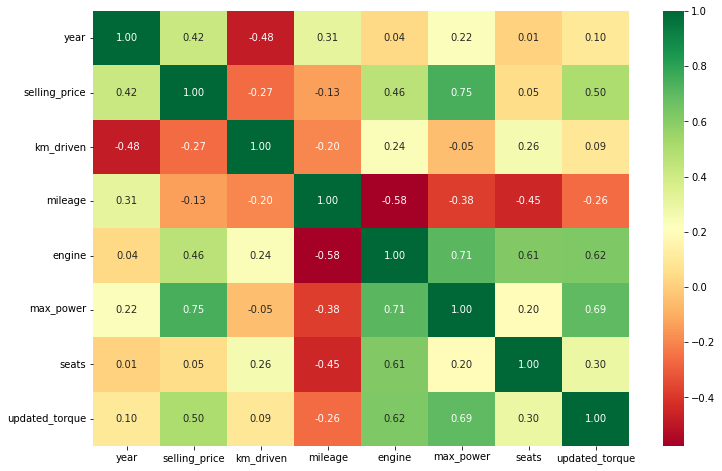

In [31]:
# Lets explore the features in this dataset and see where correlations lie 
# Plot corelation of these columns
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", fmt="0.2f");

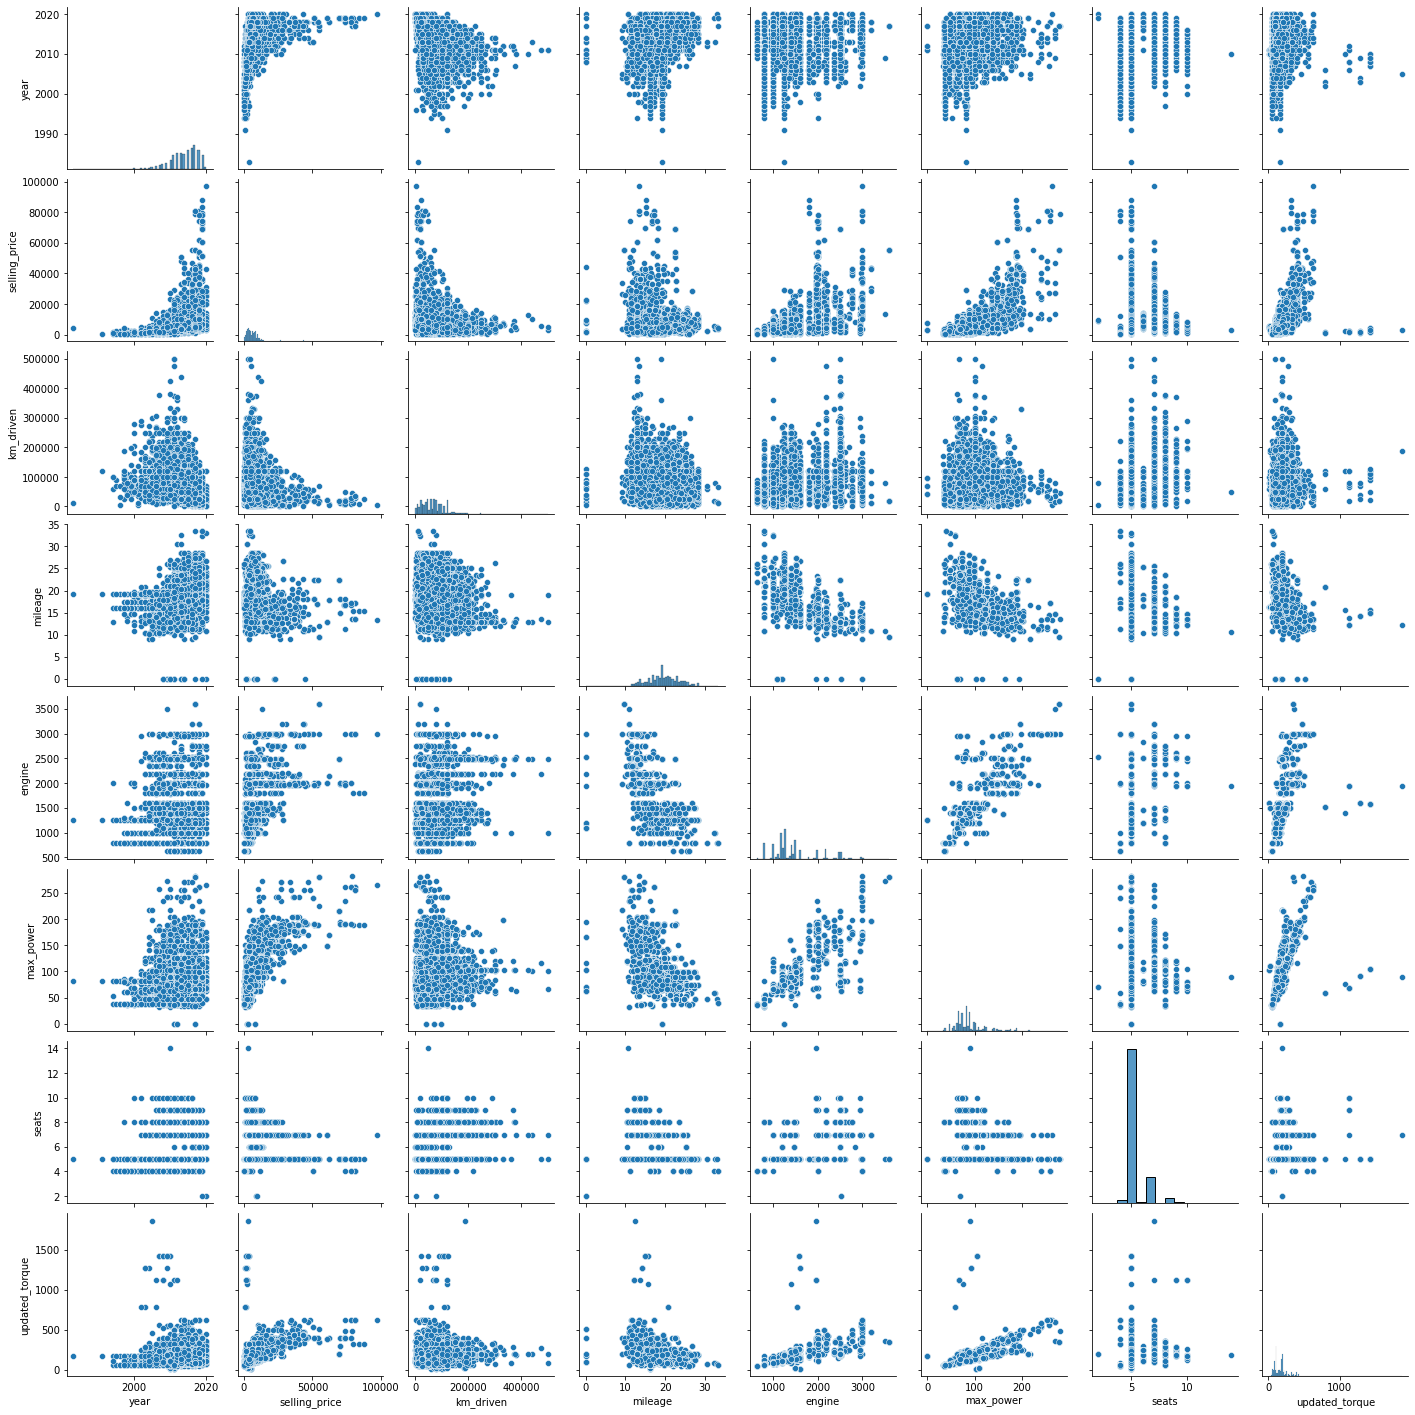

In [32]:
sns.pairplot(df)

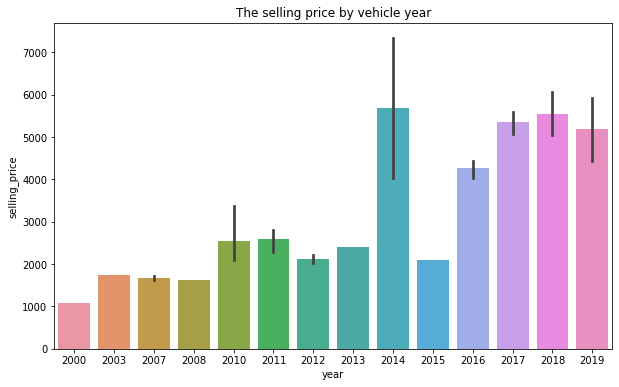

In [33]:
top_selling = df.sort_values(by='fuel', ascending=True)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_selling.selling_price, x=top_selling.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('The selling price by vehicle year')
plt.show();

In [34]:
df.name.value_counts()

Maruti           2447
Hyundai          1414
Mahindra          771
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              66
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: name, dtype: int64

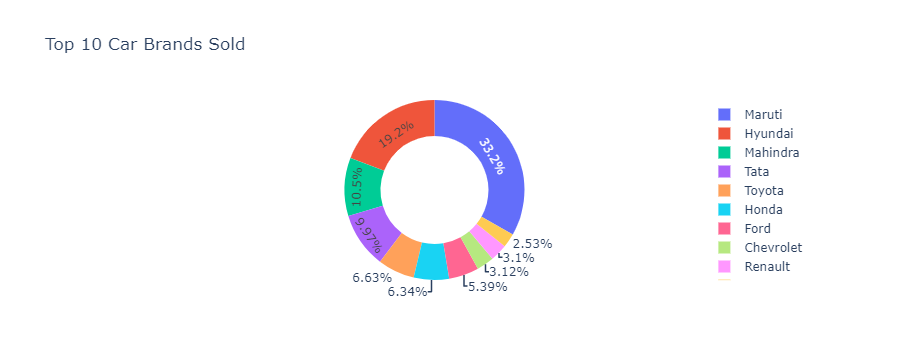

In [35]:
px.pie(data_frame = df, names = df.name.value_counts().head(10).index,
       values = df.name.value_counts().values[0:10],
       template='plotly',
     
      title = "Top 10 Car Brands Sold",hole = 0.6
      )

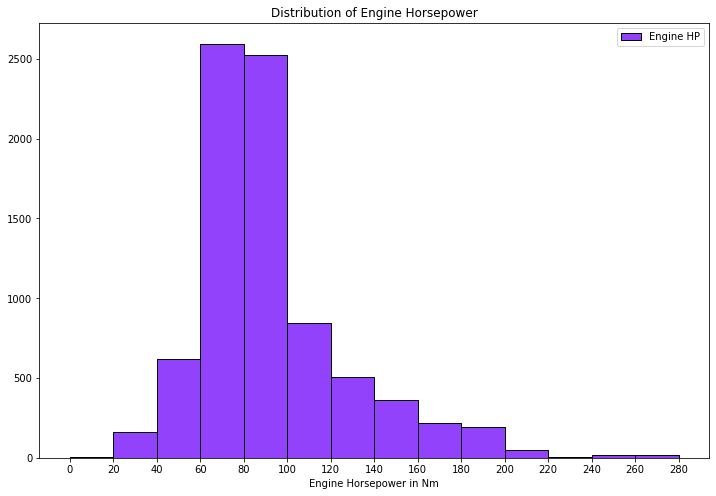

In [36]:
# Plotting the distribution of the employment period column
bins = np.arange(df.max_power.min(),df.max_power.max(),20)
sns.histplot(df.max_power, label="Engine HP",color="#6f03fc",bins=bins)
plt.xlabel("Engine Horsepower in Nm")
plt.xticks(bins)
plt.title('Distribution of Engine Horsepower')
plt.ylabel('')
plt.legend()
plt.show();

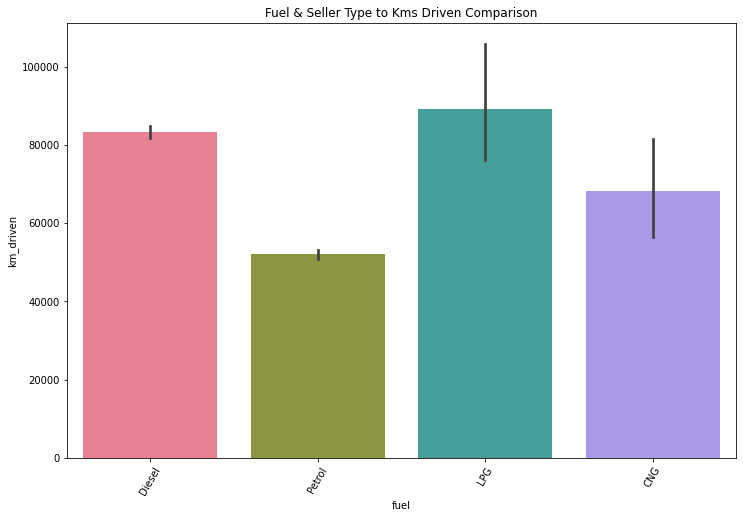

In [37]:
# Visualizing kms driven by fuel type
sns.barplot(df["fuel"],df.km_driven, palette="husl")
plt.xticks(rotation=60)
plt.title("Fuel & Seller Type to Kms Driven Comparison")
plt.show();

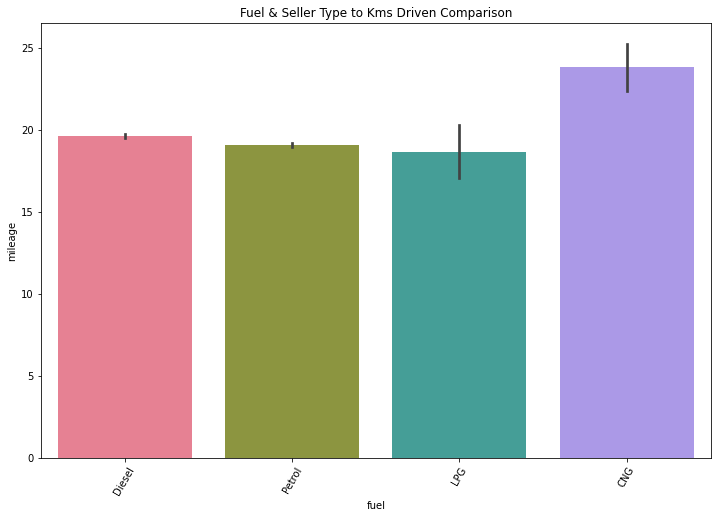

In [38]:
# Visualizing kms driven by fuel type
sns.barplot(df["fuel"],df.mileage, palette="husl")
plt.xticks(rotation=60)
plt.title("Fuel & Seller Type to Kms Driven Comparison")
plt.show();

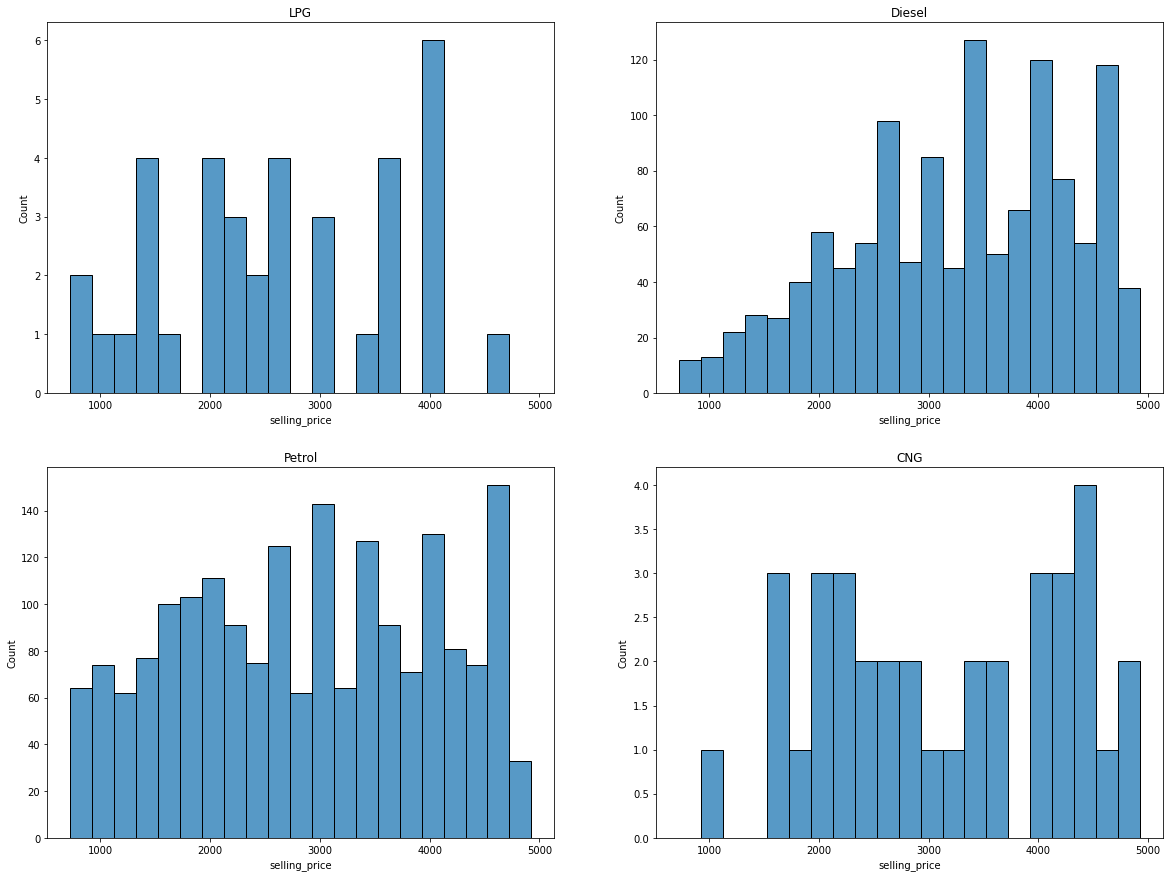

In [39]:
dfLPG = df[df.fuel=='LPG']
dfDiesel = df[df.fuel=='Diesel']
dfPetrol= df[df.fuel=='Petrol']
dfCNG = df[df.fuel=='CNG']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))
bins = np.arange(dfLPG.selling_price.min(),dfLPG.selling_price.max(),200)
sns.histplot(dfLPG.selling_price,bins=bins,ax=ax1,palette='coolwarm')
sns.histplot(dfDiesel.selling_price,bins=bins,ax=ax2,palette='coolwarm')
sns.histplot(dfPetrol.selling_price,bins=bins,ax=ax3,palette='coolwarm')
sns.histplot(dfCNG.selling_price,bins=bins,ax=ax4,palette='coolwarm')
ax1.set_title('LPG')
ax2.set_title('Diesel')
ax3.set_title('Petrol')
ax4.set_title('CNG')
plt.show();

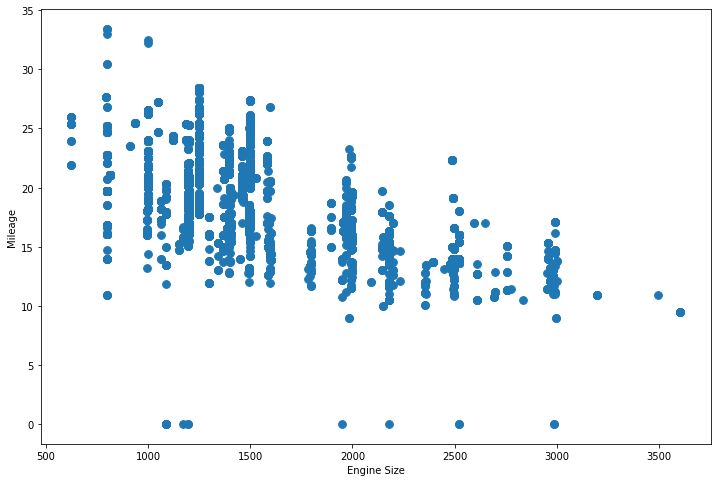

In [40]:
plt.scatter(df.engine, df.mileage, s=60)
plt.ylabel('Mileage')
plt.xlabel('Engine Size')
plt.show();

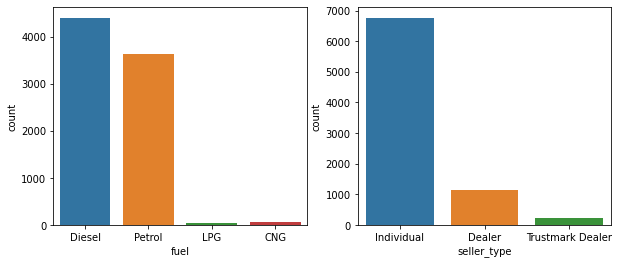

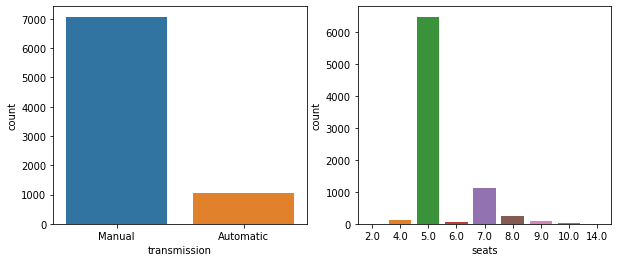

In [41]:
#Plotting 
cat_cols = ['fuel','seller_type','transmission', 'seats']
i=0
while i <4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
plt.show();

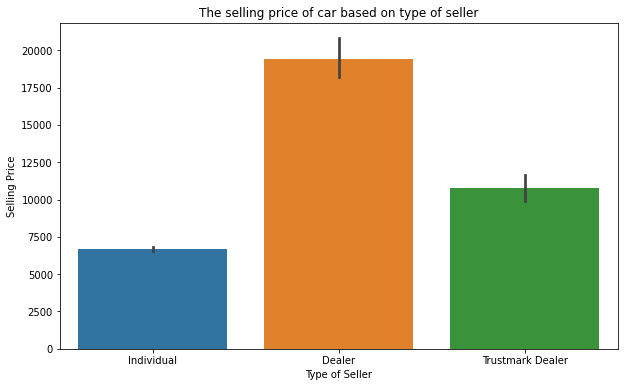

In [42]:
top_sell = df.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=df.selling_price, x=df.seller_type)
plt.xticks()
plt.xlabel('Type of Seller')
plt.ylabel('Selling Price')
plt.title('The selling price of car based on type of seller')
plt.show();

In [43]:
df.selling_price.mean()

8571.718107689243

In [44]:
# # Plotting continues variables and the target outcomes
# vars_to_plot = ["max_power","km_driven","selling_price"]
# for i in vars_to_plot:
#     # Plotting a catplot
#     sns.catplot(x = "selling_price", y = i, data=df, kind="box",height=6)
#     plt.title(i)
#     # Showing concentration of data points with stripplot
#     sns.stripplot(x = "selling_price", y = i, data=df, jitter=0.06, alpha=0.03, color='k')
# plt.show();

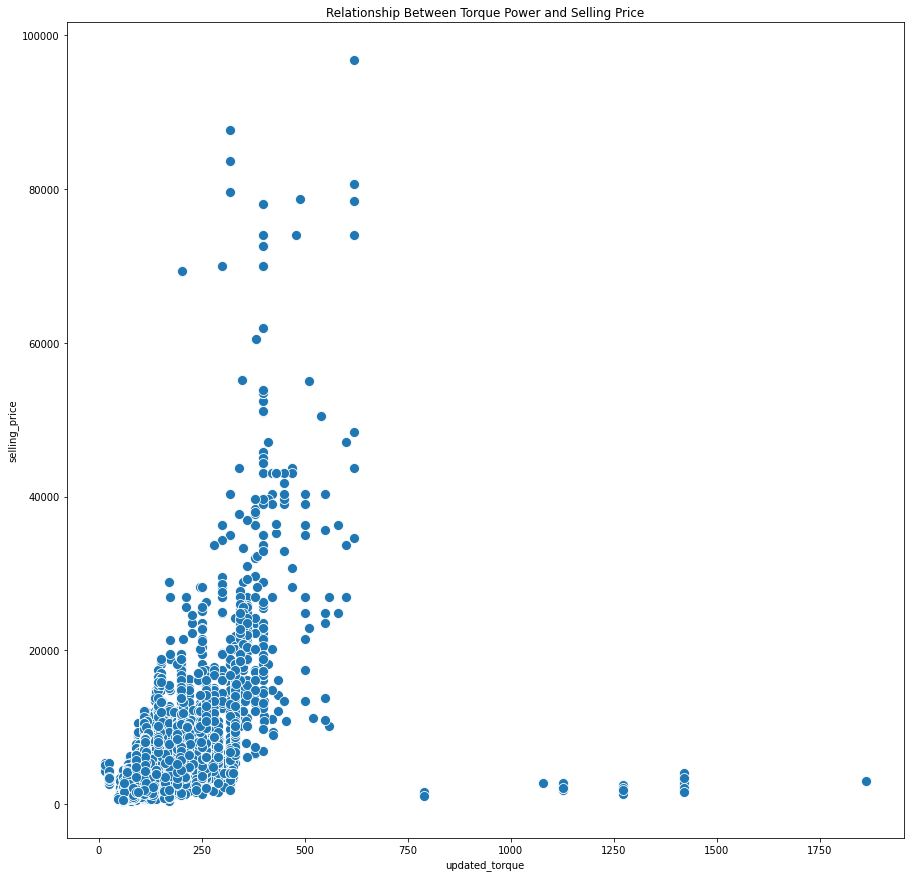

In [45]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='updated_torque',y='selling_price',data=df,s=100)
plt.title('Relationship Between Torque Power and Selling Price')
plt.show();

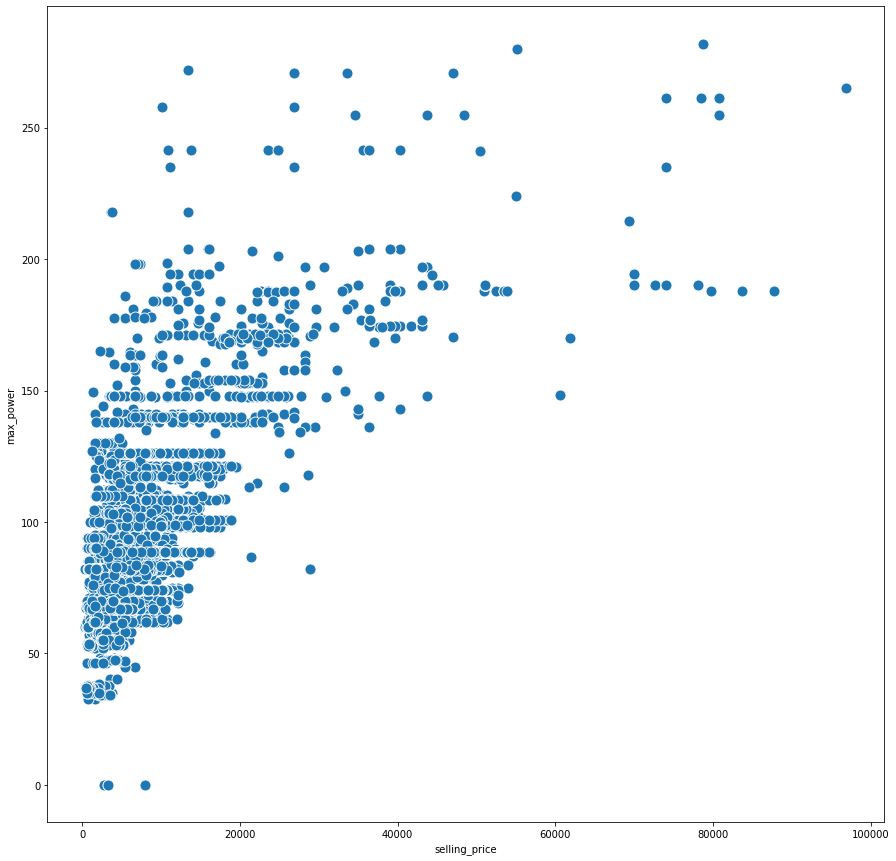

In [46]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='selling_price',y='max_power',s=120,data=df)
plt.show();

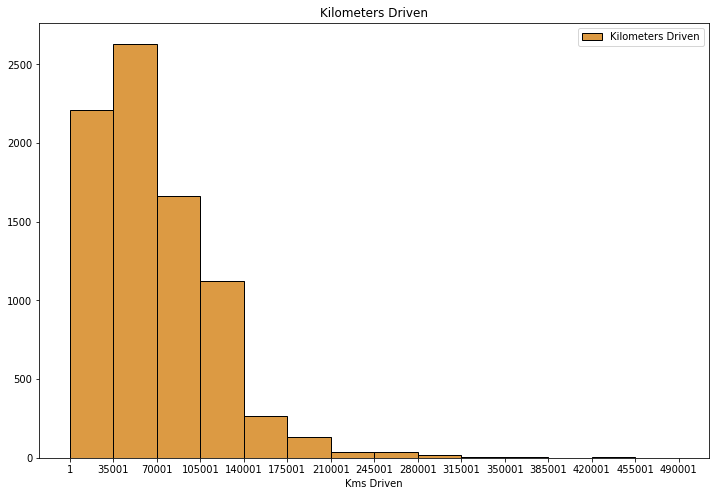

In [47]:
# Plotting the distribution of the employment period column
bins = np.arange(df.km_driven.min(),df.km_driven.max(),35000)
sns.histplot(df.km_driven, label="Kilometers Driven",color="#d17804",bins=bins)
plt.xlabel("Kms Driven")
plt.xticks(bins)
plt.title('Kilometers Driven')
plt.ylabel('')
plt.legend()
plt.show();

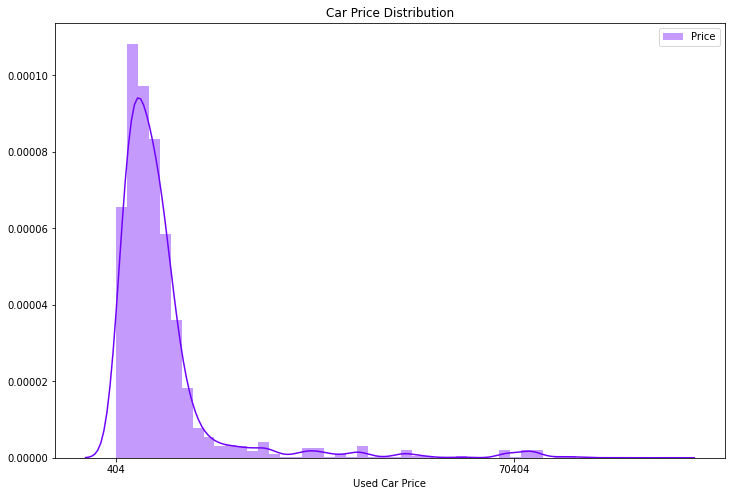

In [48]:
# Plotting the distribution of the employment period column
bins = np.arange(df.selling_price.min(),df.selling_price.max(),70000)
sns.distplot(df.selling_price, label="Price",color="#6f03fc")
plt.xlabel("Used Car Price")
plt.title('Car Price Distribution')
plt.ylabel('')
plt.xticks(bins)
plt.legend()
plt.show();

# Plotting the distribution of the employment period column


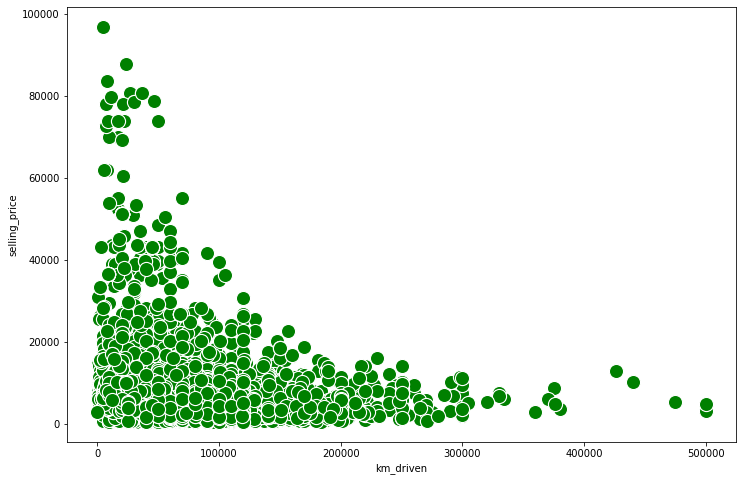

In [49]:
#Plotting the relationship between price and Kms driven

sns.scatterplot(df["km_driven"],df.selling_price,color='green', s=200);

#sns.kdeplot(data=df, x = "selling_price", y = "km_driven", fill=True, thresh=0, levels=5, cmap="mako");
#plt.hist2d(df["selling_price"], df["km_driven"], bins=25, cmap="magma", alpha=0.3);

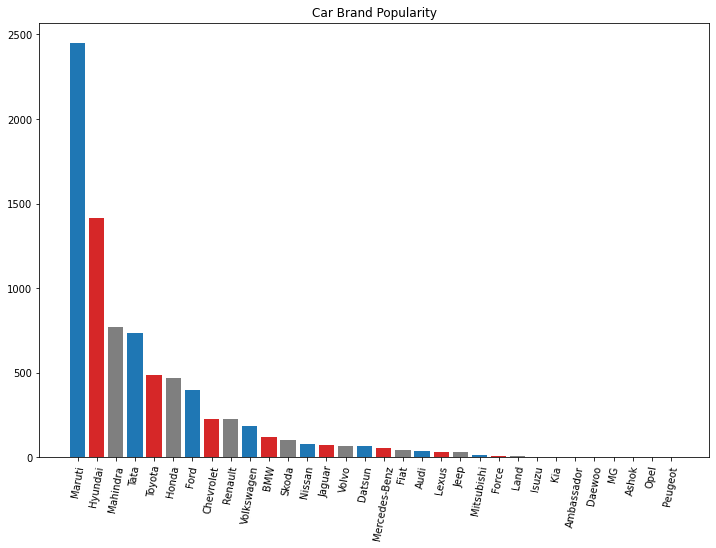

In [50]:
#Create a dataframe for cars and how many were sold
topv = df.name.value_counts()
topv = df.name.value_counts().to_frame().reset_index()
#Lets visualize and explore car brands
plt.bar(topv["index"],topv.name,color=['C0', 'C3', 'C7'])
plt.xticks(rotation=80)                               
plt.title("Car Brand Popularity")
plt.show();

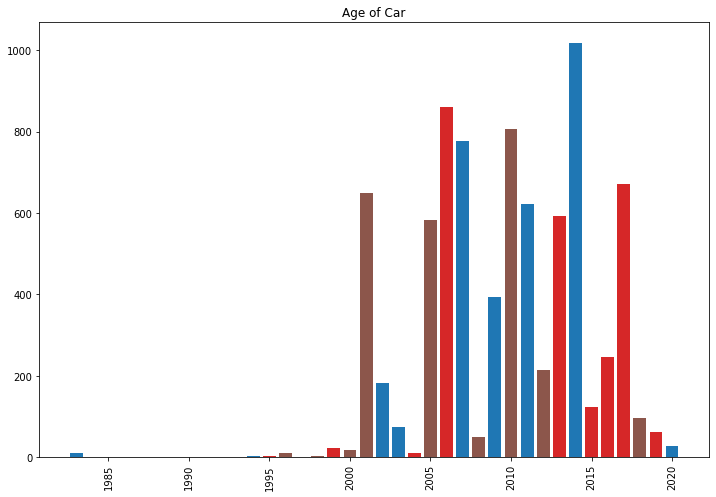

In [51]:
# Lets visualize and explore the relationship between fuel type and price
#bins=arange(1985 - )
plt.bar(df.year.unique(),df.year.value_counts(),color=['C0', 'C3', 'C5'])
plt.xticks(rotation=90)           
plt.title("Age of Car")
plt.show();

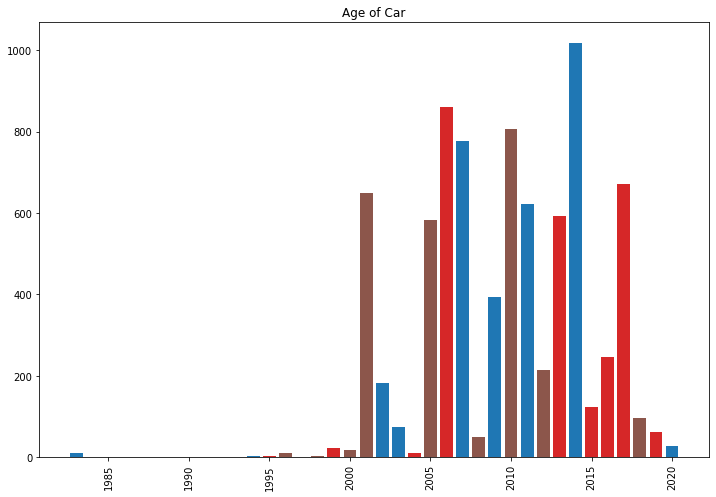

In [52]:
# Lets visualize and explore the relationship between fuel type and price
#bins=arange(1985 - )
plt.bar(df.year.unique(),df.year.value_counts(),color=['C0', 'C3', 'C5'])
plt.xticks(rotation=90)           
plt.title("Age of Car")
plt.show();

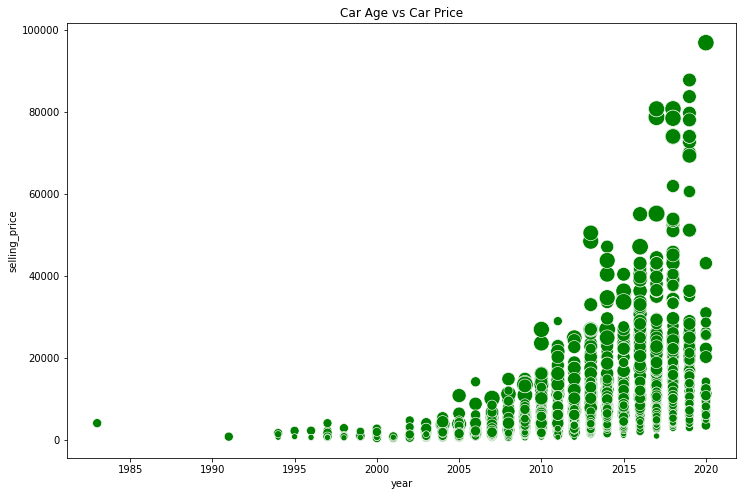

In [53]:
#Plotting the relationship between selling price, the car's age and its engine size
 
sns.scatterplot( df["year"], df["selling_price"],s=df['max_power'], color='green')
plt.title('Car Age vs Car Price')
plt.show();

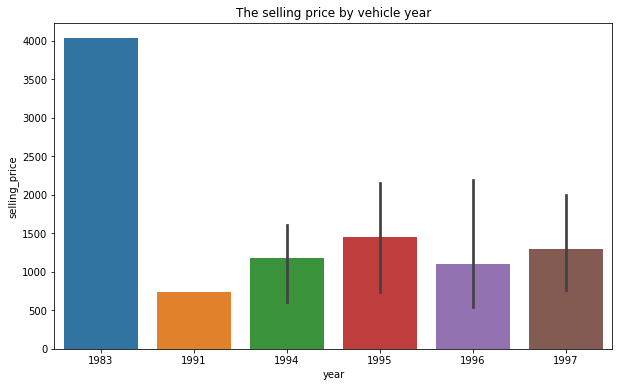

In [54]:
top_selling = df.sort_values(by='year', ascending=False).tail(20)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_selling.selling_price, x=top_selling.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('The selling price by vehicle year')
plt.show();

<AxesSubplot:xlabel='selling_price'>

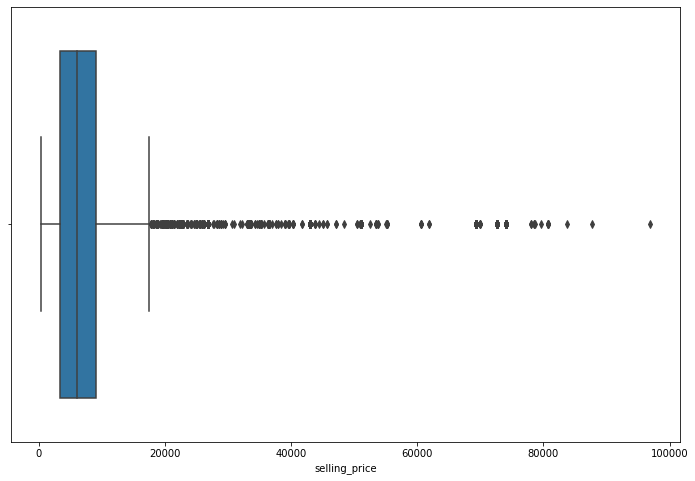

In [55]:
sns.boxplot(df['selling_price'])

<AxesSubplot:xlabel='max_power'>

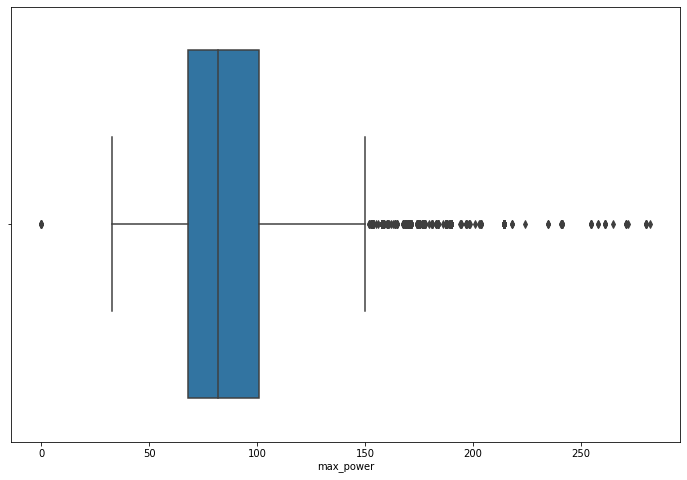

In [56]:
sns.boxplot(df['max_power'])

<AxesSubplot:xlabel='mileage'>

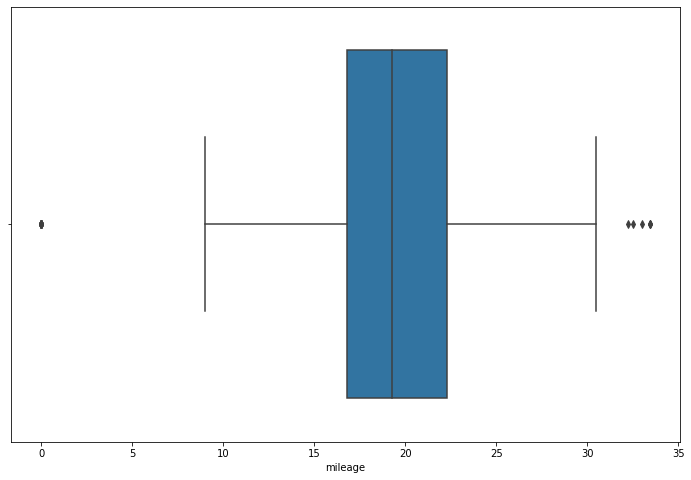

In [57]:
sns.boxplot(df['mileage'])

<AxesSubplot:xlabel='engine'>

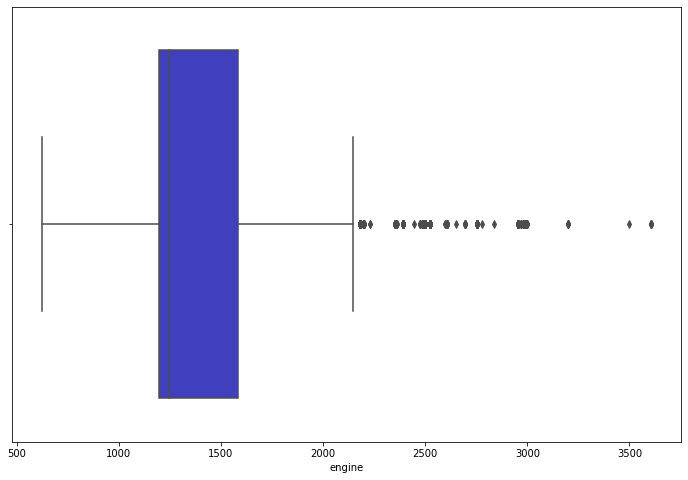

In [58]:
sns.boxplot(df['engine'], color='blue', saturation=0.50)

<AxesSubplot:xlabel='updated_torque'>

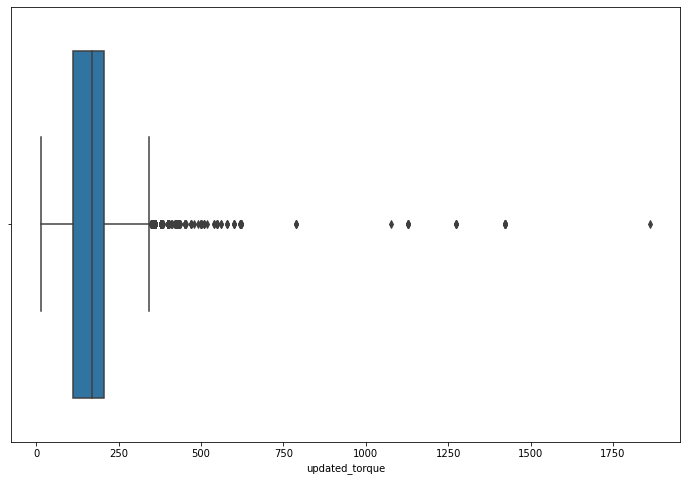

In [59]:
sns.boxplot(df['updated_torque'])

In [60]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'updated_torque', 'model'],
      dtype='object')

## Recommendation Charts

In [61]:
df['year'] = df['year'].astype('int')
print('Selling Price of Cars by Year')
display(df[["year",'name','selling_price']].groupby(["name",
                                                         "year"]).agg("sum").sort_values(by="selling_price",
                                                          ascending = True).head(10).style.background_gradient(cmap='Greens'))

#Comparing selling price with seller type
# sns.lineplot(df['year'],df['selling_price'],hue=df['seller_type'])
# plt.title('Does type of seller change the selling price?',fontsize=20)
# plt.xticks(fontsize=18)
# plt.xlabel(" ")
plt.show();


Selling Price of Cars by Year


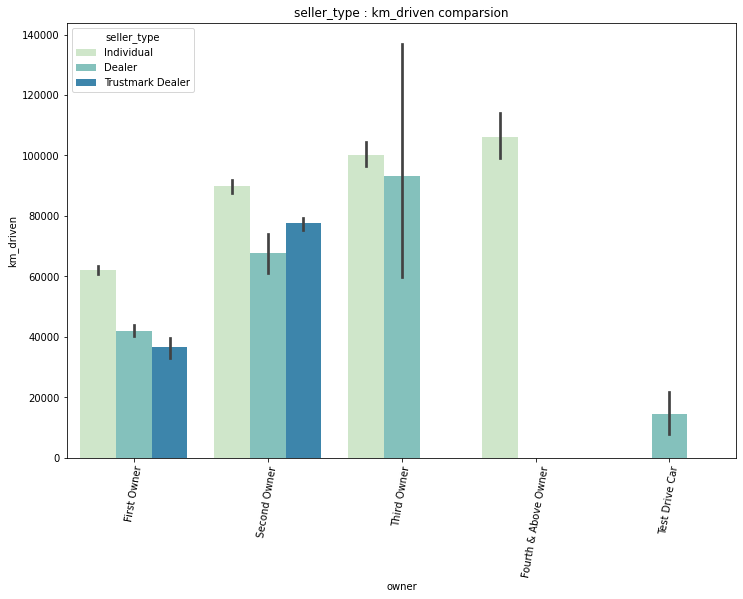

In [62]:
sns.barplot(df["owner"],df["km_driven"],hue= df["seller_type"],palette="GnBu")
plt.xticks(rotation=80)
plt.title("seller_type : km_driven comparsion")
plt.show();

,name,transmission,year,km_driven,fuel,seller_type,selling_price
2938,BMW,Automatic,2020,5000,Diesel,Individual,96855.264000
7713,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000
1071,BMW,Automatic,2018,28156,Diesel,Dealer,80712.720000
4101,BMW,Automatic,2018,28156,Diesel,Dealer,80712.720000
136,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
6456,Jaguar,Automatic,2015,70000,Diesel,Individual,40356.360000
4680,Toyota,Automatic,2017,60000,Diesel,Dealer,36993.330000
4772,Audi,Automatic,2015,105000,Diesel,Dealer,36320.724000
4375,Mercedes-Benz,Automatic,2015,100000,Diesel,Individual,34975.512000
82,BMW,Automatic,2016,30000,Petrol,Individual,33630.300000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
6724,Land,Automatic,2013,77500,Diesel,Individual,26904.240000
1676,Mercedes-Benz,Automatic,2011,110000,Diesel,Individual,22868.604000
4527,Mercedes-Benz,Automatic,2011,110000,Diesel,Individual,22868.604000
7381,Mahindra,Automatic,2016,91567,Diesel,Individual,17487.756000
778,Ford,Automatic,2013,110000,Diesel,Individual,14461.029000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
3321,Audi,Automatic,2009,98000,Diesel,Individual,10896.217200
7905,Maruti,Manual,2014,141000,Diesel,Individual,9416.484000
4752,Toyota,Manual,2009,242000,Diesel,Individual,8743.878000
5302,Ford,Manual,2017,40000,Diesel,Individual,8407.575000
7916,Hyundai,Manual,2014,100000,Diesel,Individual,8071.272000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
4952,Audi,Automatic,2019,23600,Petrol,Dealer,87748.178760
4950,Audi,Automatic,2019,7800,Petrol,Dealer,83712.542760
4951,Audi,Automatic,2019,11500,Petrol,Dealer,79676.906760
6220,Honda,Automatic,2019,24857,Petrol,Dealer,26904.240000
4383,Volkswagen,Manual,2019,5400,Diesel,Dealer,18160.362000


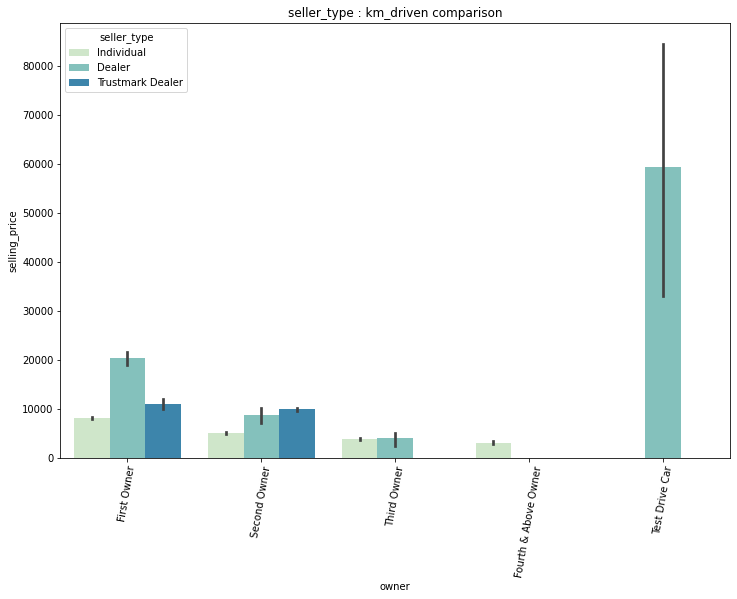

In [63]:
display(df[df["owner"]=="First Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))
display(df[df["owner"]=="Second Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))

display(df[df["owner"]=="Third Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))

display(df[df["owner"]=="Fourth & Above Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))

display(df[df["owner"]=="Test Drive Car"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="GnBu"))


sns.barplot(df["owner"],df["selling_price"],hue= df["seller_type"],palette="GnBu")
plt.xticks(rotation=80)
plt.title("seller_type : km_driven comparison")
plt.show();

In [64]:
#Let's plot a comparison of car brands and their max selling prices
#We'll group the name and get the max and average selling price of each vehicle
print('Car Brands Highest, Lowest and Average Selling Price')
display(df[["name","selling_price",]].groupby(["name"]).agg(["max","mean","min"]).style.background_gradient(cmap="Blues"))
# here we are ploting these values using lineplot
#df[["name","selling_price",]].groupby(["name"]).agg(["max","mean","min"]).plot(kind="line",color =["red","#42f57b","blue"])
#plt.title("Which cars sell highest, average and minimum prices?", fontsize=20)

#plt.ylabel("selling_price",fontsize=9) 
#plt.xticks(rotation=80)

# #Plot a list of all the bestselling vehicles in the dataset
# print("Best Selling Cars")
# display(df.loc[df.groupby(df["name"])["selling_price"].idxmax()][["name",
#                                                                   "selling_price"]].style.background_gradient(
#     cmap="copper"))

plt.show();

Car Brands Highest, Lowest and Average Selling Price


,name,transmission,year,km_driven,fuel,seller_type,selling_price
2938,BMW,Automatic,2020,5000,Diesel,Individual,96855.264000
4101,BMW,Automatic,2018,28156,Diesel,Dealer,80712.720000
7713,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000
5258,Mercedes-Benz,Automatic,2017,37000,Diesel,Dealer,80712.720000
4766,BMW,Automatic,2018,27000,Diesel,Dealer,80712.720000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
4952,Audi,Automatic,2019,23600,Petrol,Dealer,87748.178760
4950,Audi,Automatic,2019,7800,Petrol,Dealer,83712.542760
4951,Audi,Automatic,2019,11500,Petrol,Dealer,79676.906760
5256,Mercedes-Benz,Automatic,2019,17000,Petrol,Dealer,69951.024000
7710,Mercedes-Benz,Automatic,2019,17000,Petrol,Dealer,69951.024000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
5749,Maruti,Manual,2014,35000,CNG,Individual,7331.405400
6488,Maruti,Manual,2019,35000,CNG,Individual,6187.961748
2527,Maruti,Manual,2018,70000,CNG,Individual,6187.961748
2767,Maruti,Manual,2018,50000,CNG,Individual,6053.454000
1350,Maruti,Manual,2019,60000,CNG,Individual,6053.454000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
3042,Hyundai,Manual,2015,60000,LPG,Individual,5044.545000
3823,Hyundai,Manual,2012,30000,LPG,Individual,4708.242000
7642,Chevrolet,Manual,2012,70000,LPG,Individual,4035.636000
4545,Hyundai,Manual,2012,60000,LPG,Individual,4035.636000
1511,Maruti,Manual,2012,100000,LPG,Individual,4035.636000


,name,transmission,year,km_driven,fuel,seller_type,selling_price


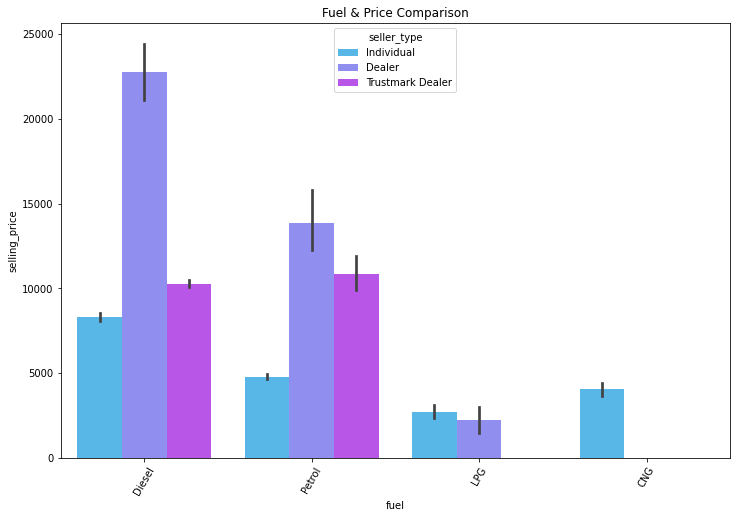

In [65]:
display(df[df["fuel"]=="Diesel"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))
display(df[df["fuel"]=="Petrol"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))

display(df[df["fuel"]=="CNG"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))

display(df[df["fuel"]=="LPG"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))

display(df[df["fuel"]=="Electric"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="cool"))


sns.barplot(df["fuel"],df["selling_price"],hue= df["seller_type"],palette="cool")
plt.xticks(rotation=60)
plt.title("Fuel & Price Comparison")
plt.show();

## Machine Learning Module

In [66]:
df.drop(['model'],inplace=True,axis=1)

In [67]:
categories = df.select_dtypes(["object"]).columns
numerical = list(df.select_dtypes(["float64","int64"]).columns)
print(f"Number of numerical columns: {len(numerical)}")
print(f"Number of categorical columns: {len(categories)}")

Number of numerical columns: 7
Number of categorical columns: 5


In [68]:
# OneHotEncoding the categorical variables
df = pd.get_dummies(df, columns=categories, drop_first=True)
print(f"The dataset shape after OneHotEncoding is: {df.shape}")

The dataset shape after OneHotEncoding is: (8124, 49)


In [69]:
#Selecting the target and independent variables
X = df.iloc[:,2:]
y =  df.iloc[:,1]
X
y
X.shape
y.shape

,km_driven,mileage,engine,max_power,seats,updated_torque,name_Ashok,name_Audi,name_BMW,name_Chevrolet,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248.0,74.00,5.0,190.00,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498.0,103.52,5.0,250.00,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497.0,78.00,5.0,124.46,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396.0,90.00,5.0,219.52,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298.0,88.20,5.0,112.70,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,18.50,1197.0,82.85,5.0,113.70,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
8124,119000,16.80,1493.0,110.00,5.0,235.20,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0
8125,120000,19.30,1248.0,73.90,5.0,190.00,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
8126,25000,23.57,1396.0,70.00,5.0,140.00,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


0       6053.45400
1       4977.28440
2       2125.43496
3       3026.72700
4       1748.77560
           ...    
8123    4304.67840
8124    1816.03620
8125    5138.70984
8126    3901.11480
8127    3901.11480
Name: selling_price, Length: 8124, dtype: float64

(8124, 47)

(8124,)

#### Scaling the data (standardizing)

In [70]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = SC.fit_transform(X)


#### Splitting the data (Training dataset and Testing Dataset)

In [71]:
#Splitting the data set for train/test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

### Creating & Training the Models

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [73]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,updated_torque,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,2013.805145,8571.718108,69303.928237,19.413469,1452.824963,91.225129,5.405465,179.940519,0.000123,0.004924,...,0.541728,0.004677,0.446578,0.832349,0.029050,0.870876,0.021418,0.258863,0.000615,0.068316
std,4.044115,10757.882803,47640.408539,3.974708,498.194262,35.213540,0.948793,107.788823,0.011095,0.070000,...,0.498286,0.068236,0.497169,0.373579,0.167956,0.335357,0.144782,0.438037,0.024802,0.252303
min,1983.000000,403.550148,1.000000,0.000000,624.000000,0.000000,2.000000,14.900000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,3430.277148,35000.000000,16.800000,1197.000000,68.100000,5.000000,112.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,6053.454000,60000.000000,19.300000,1248.000000,82.000000,5.000000,170.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,9080.181000,98000.000000,22.277500,1582.000000,101.000000,5.000000,205.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,96855.264000,500000.000000,33.440000,3604.000000,282.000000,14.000000,1862.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Create a list of classifiers to be tested with the dataset
regressors = [['RandomForest:',RandomForestRegressor()],
               ['LinearRegression:',LinearRegression()],
              ['SupportVectorMachine:',SVR()],
              ['DecisionTree:', DecisionTreeRegressor()],
              ['XGBoostRegressor:',XGBRegressor()],
              ['GradientBoostingRegressor:',GradientBoostingRegressor()]
              ]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, regressor in regressors:
    regressor = regressor
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracyMAE = mean_absolute_error(y_test, predictions)
    accuracyRMSE = mean_squared_error(y_test, predictions, squared=False)
    R2 = r2_score(y_test, predictions)
    cv_score = cross_val_score(regressor, X_test, y_test, cv=10, scoring='max_error')
    scores_df = pd.DataFrame([[name.strip(" :"), accuracyRMSE,accuracyMAE,R2,abs(cv_score.mean())]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'AccuracyRMSE','AccuracyMAE','R2','CV_Max_Error']
#metrics_df.to_csv('Regressor_Scores.csv', index=False)
metrics_df

RandomForestRegressor()

LinearRegression()

SVR()

DecisionTreeRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

GradientBoostingRegressor()

,Classifier,AccuracyRMSE,AccuracyMAE,R2,CV_Max_Error
0,RandomForest,2438.914567,1127.081122,0.952781,2.639910e+04
0,LinearRegression,5041.477080,2558.078271,0.798238,2.231237e+16
0,SupportVectorMachine,11460.427772,5144.636708,-0.042616,6.799929e+04
0,DecisionTree,2816.881104,1246.760892,0.937012,3.901115e+04
0,XGBoostRegressor,2441.190267,1133.580102,0.952693,2.877417e+04
0,GradientBoostingRegressor,2805.309935,1630.320178,0.937528,2.548893e+04


In [75]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,predictions)

0.3223850653868738

## Risidual Modeling 

In [76]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_test-y_pred_test),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.99
Test R2-score : 0.95
Train CV scores : [0.93519177 0.94401566 0.94081523 0.95038101 0.96598143]
Train CV mean : 0.95


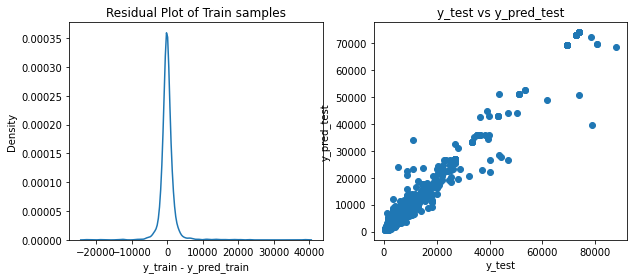

Train R2-score : 0.99
Test R2-score : 0.95
Train CV scores : [0.93683796 0.94885783 0.95052161 0.94856086 0.96915835]
Train CV mean : 0.95


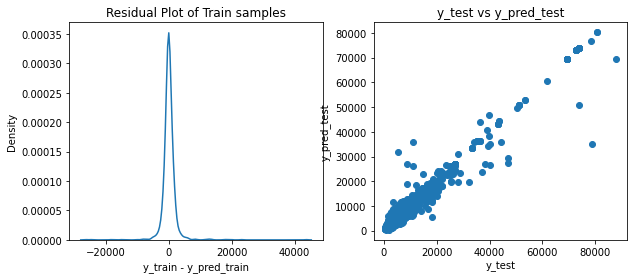

In [77]:
#Plotting risidual samples to determine if Random Forest or XGBoost are better ML candidates
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
car_pred_model(rf,"Random_Forest.pkl")
#XGBoost
from xgboost import XGBRegressor
XG = XGBRegressor()
car_pred_model(XG,"XGBoost_regressor.pkl")

## Hyper-Paramater Tuning 

### XGBoost Tuning

In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

XGB = XGBRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#Type of booster
booster = ['gbtree','dart']
# Number of parellel trees
num_parallel_tree = [5]
# Maximum number of levels in the tree structure
max_depth=list(range(2,8,2))
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "booster": booster,
              "max_depth":max_depth,
            'num_parallel_tree': num_parallel_tree}

XGB_rs = RandomizedSearchCV(
    estimator = XGB, param_distributions = param_grid,n_iter=10,n_jobs=6,scoring='neg_mean_absolute_error')

In [79]:
XGB_rs.fit(X_test,y_test)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
     

In [80]:
y_pred = XGB_rs.predict(X_test)
cross_val = cross_val_score(XGB_rs ,X_train ,y_train ,cv=10)

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Our R2 is: {r2_score(y_test, y_pred)}")
print(f"Our MAE is: {mean_absolute_error(y_test, y_pred)}")
print(f"Our MSRE is: {mean_squared_error(y_test, y_pred, squared=False)}")
#print(f"Our CV Accuracy Score is: {cross_val_score(XGB_rs)}")

Our R2 is: 0.9910728678549265
Our MAE is: 771.608782247245
Our MSRE is: 1060.460814244843


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators': [30, 60, 100], 
     'max_features': [0,3, 0.5, 0.7], 
     'min_samples_leaf': [2,3,5], 
     'oob_score':[True]},
    
    {'bootstrap': [False], 
     'n_estimators': [30, 60, 100], 
     'max_features': [0,3, 0.5, 0.7],
     'min_samples_leaf': [2,3,5], 
     'oob_score':[True]},
  ]

%time
rf = RandomForestRegressor(random_state=666)

grid_search = GridSearchCV(rf, params, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

Wall time: 0 ns


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=666),
             param_grid=[{'max_features': [0, 3, 0.5, 0.7],
                          'min_samples_leaf': [2, 3, 5],
                          'n_estimators': [30, 60, 100], 'oob_score': [True]},
                         {'bootstrap': [False],
                          'max_features': [0, 3, 0.5, 0.7],
                          'min_samples_leaf': [2, 3, 5],
                          'n_estimators': [30, 60, 100], 'oob_score': [True]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
m = grid_search.best_estimator_

In [84]:
m

RandomForestRegressor(max_features=0.7, min_samples_leaf=2, oob_score=True,
                      random_state=666)

In [85]:

RF = RandomForestRegressor(max_features=0.7, min_samples_leaf=2, oob_score=True,
                      random_state=666)

In [86]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_features=0.7, min_samples_leaf=2, oob_score=True,
                      random_state=666)

In [87]:
y_pred = RF.predict(X_test)

In [88]:
print(f'This is my Predicted data: {y_pred[2]:0.2f}')
print(f'This is my Real data: {y_test[2]}')

This is my Predicted data: 10075.97
This is my Real data: 2125.43496


In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2548.815549238639

### Random Forest Tuning

In [90]:
#Importing regressor model
from sklearn.ensemble import RandomForestRegressor
regressorRF = RandomForestRegressor(n_estimators=3000, random_state=42,max_depth=25,max_features='log2',
                                   bootstrap=False)
regressorRF.fit(X_train, y_train)


# from sklearn.linear_model import LinearRegression

# regressorL = LinearRegression()
# regressorL.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=25, max_features='log2',
                      n_estimators=3000, random_state=42)

In [91]:
min_impurity_decrease=200

In [92]:
y_pred = regressorRF.predict(X_test)
cross_val = cross_val_score(regressorRF ,X_train ,y_train ,cv=10)

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Our R2 is: {r2_score(y_test, y_pred)}")
print(f"Our MAE is: {mean_absolute_error(y_test, y_pred)}")
print(f"Our MSRE is: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Our CV Accuracy Score is: {cross_val.mean()}")

Our R2 is: 0.9608618095907435
Our MAE is: 1067.2106482676352
Our MSRE is: 2220.43985725546
Our CV Accuracy Score is: 0.9560686224253839


## Feature Importance Selection

In [94]:
categories = df.select_dtypes(["object"]).columns
numerical = list(df.select_dtypes(["float64","int64"]).columns)
print(f"Number of numerical columns: {len(numerical)}")
print(f"Number of categorical columns: {len(categories)}")

Number of numerical columns: 7
Number of categorical columns: 0


In [95]:
# OneHotEncoding the categorical variables
df = pd.get_dummies(df, columns=categories, drop_first=True)
print(f"The dataset shape after OneHotEncoding is: {df.shape}")

The dataset shape after OneHotEncoding is: (8124, 49)


In [96]:
# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# remember to set the seed, the random state in this function
SFM = SelectFromModel(Lasso(alpha=0.001, random_state=0),max_features=25)

# train Lasso model and select features
SFM.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0), max_features=25)

In [97]:
# # this is how we can make a list of the selected features
# selectedFeatures = X.columns[(SFM.get_support())]
# # let's print some stats
# print('total features: {}'.format((X.shape[1])))
# print('selected features: {}'.format(len(selectedFeatures)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(SFM.estimator_.coef_ == 0)))

# # X_train = X_train.loc[:,selectedFeatures]
# # X_test = X_test.loc[:,selectedFeatures]
# # X_train
# # y_train

In [98]:
# X = X.loc[:,selectedFeatures]

# X

In [99]:
# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# remember to set the seed, the random state in this function
SFM = SelectFromModel(Lasso(alpha=0.001, random_state=0))

# train Lasso model and select features
SFM.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [100]:
feature_importance = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : m.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Neural Network 

In [ ]:
# Initialising the ANN
model = tf.keras.models.Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
model.add(tf.keras.layers.Dense(units=25, activation = 'relu'))

In [ ]:
# Adding the second hidden layer
model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

In [ ]:
# Adding the third hidden layer
model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

In [ ]:
# Adding the fourth hidden layer
model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

In [ ]:
# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [ ]:
# Compiling the mofe;
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs = 200)

In [ ]:
# Predicting with the ANN
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Our R2 is: {r2_score(y_test, y_pred)}")
print(f"Our MAE is: {mean_absolute_error(y_test, y_pred)}")
print(f"Our MSRE is: {mean_squared_error(y_test, y_pred, squared=False)}")